# Python code

The Python code used in this book is given here for reference.

## Importing libraries

The following code is used to import the libraries that we will use here. 

- [NumPy](https://numpy.org/) (pronounced *'num-pie'*) for performing numerical calculations
- [SymPy](https://www.sympy.org/en/index.html) (pronounced *'sim-pie'*) for performing symbolic calculations
- [Matplotlib](https://matplotlib.org/stable/index.html) for plotting solutions
- [IPython.display](https://ipython.org/) for displaying SymPy output using $\LaTeX$ fonts (not necessary if not using Jupyter notebooks)

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import Math

## ODE solvers

The ODE solver functions all solve an initial value problem of the form $\mathbf{y}' = f(t, \mathbf{y})$, $t \in [a, b]$ and $\mathbf{y}_0 = \mathbf{\alpha}$ using a step length of $h$. The functions return arrays containing the values of $t_n$ and $\mathbf{y}$ for the solution domain.

### The Euler method

In [2]:
def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 

### Defining and solving an IVP

The following code defines the following ODE and uses the `euler()` function with a step length of $h=0.2$ to compute the solution

$$y' = ty, \qquad t \in[0, 1], \qquad y(0) = 1.$$

In [3]:
def f(t, y):
    return t * y

def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = euler(f, tspan, y0, h)

# Print table of solution values
print("|  t   |   Euler   |   Exact   |  Error   |")
print("|:----:|:---------:|:---------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} | {exact(t[n]):9.6f} | {abs(y[n,0] - exact(t[n])):8.2e} |")


|  t   |   Euler   |   Exact   |  Error   |
|:----:|:---------:|:---------:|:--------:|
| 0.00 |  1.000000 |  1.000000 | 0.00e+00 |
| 0.20 |  1.000000 |  1.020201 | 2.02e-02 |
| 0.40 |  1.040000 |  1.083287 | 4.33e-02 |
| 0.60 |  1.123200 |  1.197217 | 7.40e-02 |
| 0.80 |  1.257984 |  1.377128 | 1.19e-01 |
| 1.00 |  1.459261 |  1.648721 | 1.89e-01 |


### Ploting the solution

The following code uses matplotlib functions to plot the solution.

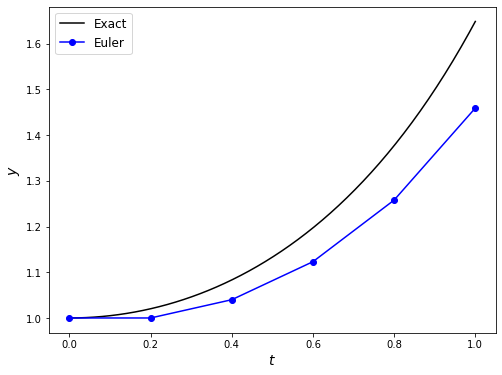

In [4]:
# Calculate exact solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)

# Plot solution
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="Euler")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

### The RK2 Method

The RK2 method (second-order Runge-Kutta method) is defined by the following Butcher tableau.

\begin{align*}
    \begin{array}{c|cc}
        0 & 0 \\
        1 & 1 \\ \hline
        & \frac{1}{2} & \frac{1}{2}
    \end{array}
\end{align*}

In [5]:
def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y

### The RK4 method

The RK4 methods (fourth-order Runge-Kutta method) is defined by the following Butcher tableau.

\begin{align*}
    \begin{array}{c|cccc}
        0 & 0 \\
        \frac{1}{2} & \frac{1}{2} \\
        \frac{1}{2} & 0 & \frac{1}{2} \\
        1 & 0 & 0 & 1 \\ \hline
        & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}
\end{align*}

In [6]:
def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        
    return t, y 

### The third-order Radau IA implicit Runge-Kutta method

The third-order Radau IA implicit Runge-Kutta method is defined by the following Butcher tableau.

\begin{align*}
    \begin{array}{c|cc}
        0 & \frac{1}{4} & -\frac{1}{4} \\
        \frac{2}{3} & \frac{1}{4} & \frac{5}{12} \\ \hline
        & \frac{1}{4} & \frac{3}{4}
    \end{array}
\end{align*}

In [7]:
def radauIA(f, tspan, y0, h, tol=1e-6):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        Y1, Y2, Y1o, Y2o = np.ones(neq), np.ones(neq), np.ones(neq), np.ones(neq)
        for k in range(100):
            Y1 = y[n,:] + h * (1/4 * f(t[n], Y1) - 1/4 * f(t[n] + 2/3 * h, Y2))
            Y2 = y[n,:] + h * (1/4 * f(t[n], Y1) + 5/12 * f(t[n] + 2/3 * h, Y2))
            if max(np.amax(abs(Y1 - Y1o)), np.amax(abs(Y2 - Y2o))) < tol:
                break
            Y1o, Y2o = Y1, Y2

        y[n+1,:] = y[n,:] + h * (1/4 * f(t[n], Y1) + 3/4 * f(t[n] + 2/3 * h, Y2))
        
    return t, y  

## Using SymPy to solve order conditions

The following code uses SymPy commands to solve the following order conditions where $c_1 = 1$

\begin{align*}
    b_1 + b_2 &= 1, \\
    b_2c_2 &= \frac{1}{2}, \\
    a_{21} b_2 &= \frac{1}{2}.
\end{align*}

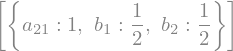

In [8]:
import sympy as sp
sp.init_printing()

# Declare symbolic variables
a21, b1, b2, c2 = sp.symbols('a21, b1, b2, c2')
c2 = 1

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - sp.Rational(1,2)
eq3 = a21 * b2 - sp.Rational(1,2)

# Solve order conditions
sp.solve((eq1, eq2, eq3))

## Stability

### Plotting stability regions

The following code plots the region of absolute stability for the Euler method.

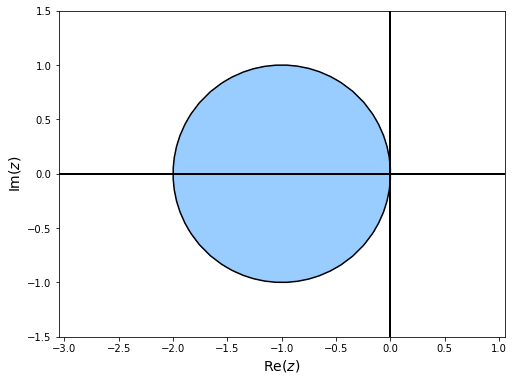

In [9]:
# Generate z values
X, Y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
Z = X + Y * 1j

# Define stability function
R = 1 + Z

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis("equal")
plt.axis([-3, 1, -1.5, 1.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()

### Stability function for explicit methods

The following code calculates the stability function for an explicit Runge-Kutta method defined by the following Butcher tableau.

\begin{align*}\begin{array}{c|cccc}
0 &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  & \\
\frac{3}{4} & 0 & \frac{3}{4} &  & \\
1 & \frac{2}{9} & \frac{1}{3} & \frac{4}{9} & \\ 
\hline
& \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8}
\end{array}\end{align*}

In [10]:
# Define ERK method
A = sp.Matrix([[0, 0, 0, 0], 
            [sp.Rational(1,2), 0, 0, 0], 
            [0, sp.Rational(3,4), 0, 0], 
            [sp.Rational(2,9), sp.Rational(1,3), sp.Rational(4,9), 0]])
b = sp.Matrix([[sp.Rational(7,24)], [sp.Rational(1,4)], [sp.Rational(1,3)], [sp.Rational(1,8)]])
e = sp.ones(4, 1)

# Calculate stability function
string = "R(z) = 1"
for k in range(len(b)):
    coefficient = b.T * A ** k * e
    string += f" + {sp.latex(coefficient[0])} z^{k+1}"

display(Math(string))

<IPython.core.display.Math object>

### Stability function for implicit methods

The following code calculates the stability function for an explicit Runge-Kutta method defined by the following Butcher tableau.

\begin{align*}
    \begin{array}{c|cc}
    \frac{1}{3} & \frac{5}{12} & -\frac{1}{12} \\
    1 & \frac{3}{4} & \frac{1}{4} \\ \hline
    & \frac{3}{4} & \frac{1}{4}
    \end{array}
\end{align*}


In [11]:
# Define numerator and denominator functions
def P(z):
    return (I - z * A + z * ebT).det()

def Q(z):
    return (I - z * A).det()


# Define RK method
A = sp.Matrix([[sp.Rational(5,12), -sp.Rational(1,12)],
            [sp.Rational(3,4), sp.Rational(1,4)]])
ebT = sp.Matrix([[sp.Rational(3,4), 0], [0, sp.Rational(1,4)]])
I = sp.eye(2)

# Calculate R(z)
z, y = sp.symbols('z, y')
Rz = P(z) / Q(z)
display(Math(f"R(z) = {sp.latex(sp.nsimplify(Rz))}"))

<IPython.core.display.Math object>

### Checking if an implicit method is A-stable

The following code outputs the following conditions for A-stability

- The roots of $Q(z)$ have positive real parts
- $E(y) = Q(iy)Q(-iy) - P(iy)P(-iy) \geq 0$

where the stability function for the method is $R(z) = \dfrac{P(z)}{Q(z)}$.

In [12]:
# Check roots of Q have positive real parts
roots = sp.solve(Q(z) - 0)
display(Math(f"\\text{{roots of }}Q(z): z = {sp.latex(roots)}"))

# Check E(y) >= 0
E = Q(1j * y) * Q(-1j * y) - P(1j * y) * P(-1j * y)
display(Math(f"E(y) = {sp.latex(sp.simplify(sp.nsimplify(E)))}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Direct methods

### LU decomposition

The following code defines the function `lu()` which calculates the LU decomposition of a square matrix $A$ and returns the lower and upper triangular matrices $L$ and $U$ such that $A = LU$. 

In [13]:
def lu(A):
    n = A.shape[0]
    L, U = np.eye(n), np.zeros((n, n))
    for j in range(n):
        for i in range(j + 1):
            for k in range(i):
                U[i,j] += L[i,k] * U[k,j]
                
            U[i,j] = A[i,j] - U[i,j]   
            
        for i in range(j + 1, n):
            for k in range(j):
                L[i,j] += L[i,k] * U[k,j]
                
            L[i,j] = 1 / U[j,j] * (A[i,j] - L[i,j])
    
    return L, U

The following code defines the following matrix and uses the function `lu()` to calculate the LU decomposition of the matrix. 

\begin{align*}
    A = \begin{pmatrix}
        1 & 3 & 0 \\
        2 & -4 & -1 \\
        -3 & 1 & 2
    \end{pmatrix}
\end{align*}

In [14]:
# Define matrix
A = np.array([[1, 3, 0], [2, -4, -1], [-3, 1, 2]])

# Calculate LU decomposition
L, U = lu(A)

print(f"L = \n{L}\n")
print(f"U = \n{U}\n")

L = 
[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-3. -1.  1.]]

U = 
[[  1.   3.   0.]
 [  0. -10.  -1.]
 [  0.   0.   1.]]



### Forward and back substitution

The following code defines the functions `forward_substitution()` and `back_substitution()` which perform forward and back substitution.

In [15]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        for j in range(i):
            x[i] += L[i,j] * x[j]
            
        x[i] = 1 / L[i,i] * (b[i] - x[i])
    
    return x


def back_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        for j in range(i, n):
            x[i] += U[i,j] * x[j]
            
        x[i] = 1 / U[i,i] * (b[i] - x[i])
        
    return x

### Crout's method

The following code calculates the solution to the following system of linear equations using Crout's method.

\begin{align*}
    \begin{pmatrix}
        1 & 3 & 0 \\
        2 & -4 & -1 \\
        -3 & 1 & 2
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} 
    = \begin{pmatrix} -7 \\ 11 \\ 1 \end{pmatrix}
\end{align*}

In [16]:
# Define linear system
A = np.array([[1, 3, 0], [2, -4, -1], [-3, 1, 2]])
b = np.array([-7, 11, 1])

# Calculate LU decomposition
L, U = lu(A)

print(f"L = \n{L}\n\nU = \n{U}\n")

# Solve linear system
y = forward_substitution(L, b)
x = back_substitution(U, y)

for i in range(len(x)):
    print(f"x{i+1} = {x[i]}")

L = 
[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-3. -1.  1.]]

U = 
[[  1.   3.   0.]
 [  0. -10.  -1.]
 [  0.   0.   1.]]

x1 = 2.0
x2 = -3.0
x3 = 5.0


### Partial pivoting

The following code defines the function `partial_pivot()` that performs partial pivoting on a matrix and outputs the matrix and the permutation matrix.

In [17]:
def partial_pivot(A):
    n = A.shape[0]
    P = np.eye(n)
    for j in range(n):
        maxpivot, k = A[j,j], j
        for i in range(j + 1, n):
            if A[i,j] > maxpivot:
                maxpivot, k = A[i,j], i
                
        A[[j, k]] = A[[k, j]]
        P[[j, k]] = P[[k, j]]
        
    return A, P

### Cholesky decomposition

The following code defines the function `cholesky()` which performs Cholesky decomposition on a matrix $A$ and outputs the lower triangular matrix $L$ such that $A = LL^\mathrm{T}$. 

In [18]:
def cholesky(A):
    n = A.shape[0]
    for i in range(n):
        if np.linalg.det(A[:n,:n]) < 0:
            print("Error! A is not a positive definite matrix")
            return
        
    L = np.zeros((n, n))   
    for j in range(n):
        for i in range(j, n):
            for k in range(j):
                L[i,j] += L[i,k] * L[j,k]
                
            if i == j:
                L[i,j] = np.sqrt(A[i,j] - L[i,j])
            else:
                L[i,j] = 1 / L[j,j] * (A[i,j] - L[i,j])   
    
    return L

### QR decomposition using the Gram-Schmidt process

The following code defines the function `qr_gramschidt()` which performs QR decomposition using the Gram-Schmidt process on a matrix $A$ and outputs the orthogonal matrix $Q$ and upper triangular matrix $R$ such that $A = QR$.

In [19]:
def qr_gramschmidt(A):
    nrows, ncols = A.shape
    Q, R = np.zeros(A.shape), np.zeros((ncols, ncols))
    for j in range(ncols):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            Q[:,j] = Q[:,j] + R[i,j] * Q[:,i]
            
        Q[:,j] = A[:,j] - Q[:,j]
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] = Q[:,j] / R[j,j]
    
    return Q, R

### QR decomposition using the Householder transformations

The following code defines the function `qr_householder()` which performs QR decomposition using the Gram-Schmidt process on a matrix $A$ and outputs the orthogonal matrix $Q$ and upper triangular matrix $R$ such that $A = QR$.

In [20]:
def qr_householder(A):
    m, n = A.shape
    Q, R = np.eye(m), np.copy(A)
    for j in range(n):
        e = np.zeros((m - j, 1)); e[0] = 1
        u = np.array([R[j:,j]]).T
        u = u + np.sign(u[0]) * np.linalg.norm(u) * e
        v = u / np.linalg.norm(u)
        H = np.eye(m)
        H[j:,j:] = np.eye(m - j) - 2 * np.dot(v, v.T)
        R = np.dot(H, R)
        Q = np.dot(Q, H)
    
    return Q, R

## Indirect methods

The following methods calculate the solutions to the system of linear equations $A \mathbf{x} = \mathbf{b}$ ceasing iterations when the largest value of the residual is less than `tol`.

### The Jacobi method



In [21]:
def jacobi(A, b, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    for k in range(maxiter):
        xo = np.copy(x)
        for i in range(n):
            s = b[i]
            for j in range(n):
                if i != j:
                    s -= A[i,j] * xo[j]
        
            x[i] = s / A[i,i]
            
        r = b - np.dot(A, x)   
        if max(abs(r)) < tol:
            break
    
    return x

### The Gauss-Seidel method

In [22]:
def gauss_seidel(A, b, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    for k in range(maxiter):
        for i in range(n):
            s = b[i]
            for j in range(n):
                if i != j:
                    s -= A[i,j] * x[j]
        
            x[i] = s / A[i,i]
            
        r = b - np.dot(A, x)   
        if max(abs(r)) < tol:
            break
    
    return x

### The SOR method

In [23]:
def sor(A, b, omega, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    for k in range(maxiter):
        for i in range(n):
            mysum = b[i]
            for j in range(n):
                if i != j:
                    mysum -= A[i,j] * x[j]
        
            x[i] = (1 - omega) * x[i] + omega / A[i,i] * mysum
            
        r = b - np.dot(A, x)   
        if max(abs(r)) < tol:
            break
    
    return x

### Calculating an iteration matrix

The following code calculates the iteration matrix for the Jacobi method give the following coefficient matrix

\begin{align*}
    A = \begin{pmatrix} 
        4 & 3 & 0 \\
        3 & 4 & -1 \\
        0 & -1 & 4
    \end{pmatrix}
\end{align*}


In [24]:
# Define coefficient matrix
A = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])

# Extract L, D and U matrices
L = np.tril(A, -1)
U = np.triu(A, 1)
D = A - L - U

# Calculate iteration matrix
TJ = - np.dot(D, L + U)
print(f"TJ = \n{TJ}")

TJ = 
[[  0 -12   0]
 [-12   0   4]
 [  0   4   0]]


### Calculating the spectral radius of a matrix

The following code calculates the spectral radius of the matrix `TJ` from above.

In [25]:
rho_TJ = max(abs(np.linalg.eigvals(TJ)))
print(f"rho(TJ) = {rho_TJ:0.4f}")

rho(TJ) = 12.6491
